#### INTRODUCTION TO TIME SERIES FORECASTING

**Time series forecasting** 
- Time series forecasting is a technique for predicting future values in a sequence of data points collected over time. It is a fundamental tool in time series analysis, used to understand patterns, trends, and seasonality in data.

Time series forecasting is a powerful tool for making data-driven decisions. By understanding the underlying patterns in time series data, organizations can make informed predictions about the future and gain a competitive edge.


**Key Concepts:**

*   **Time Series Data:** A sequence of data points collected at consistent time intervals. Examples include stock prices, weather data, sales figures, and website traffic.
*   **Forecasting:** The process of making predictions about future values based on historical data.
*   **Time Series Analysis:** The process of understanding the underlying patterns and characteristics of time series data.


**Importance of Time Series Forecasting:**

Time series forecasting is valuable for various applications, including:

*   **Business:** Demand forecasting, sales prediction, inventory management, financial planning.
*   **Economics:** Economic forecasting, inflation prediction, market analysis.
*   **Finance:** Stock price prediction, risk management.
*   **Healthcare:** Patient readmission prediction, disease outbreak forecasting.
*   **Environmental Science:** Weather forecasting, climate modeling.

**Common Time Series Forecasting Methods:**

*   **ARIMA Models:** A class of statistical models that use past values and forecast errors to make predictions.
*   **Exponential Smoothing:** A method that assigns exponentially decreasing weights to older data points.
*   **Prophet:** A forecasting model developed by Facebook, designed for time series with strong seasonality and trend components.
*   **Machine Learning Models:** Techniques like regression, neural networks, and support vector machines can be adapted for time series forecasting.

**Challenges in Time Series Forecasting:**

*   **Data Quality:** Noisy or incomplete data can affect the accuracy of forecasts.
*   **Seasonality and Trends:** Identifying and modeling complex patterns can be challenging.
*   **External Factors:** Unexpected events or external factors can impact predictions.
*   **Model Selection:** Choosing the right forecasting model for a specific dataset is crucial.

**Steps in Time Series Forecasting:**

1.  **Data Collection and Preparation:** Gather historical data and clean it to remove inconsistencies or missing values.
2.  **Exploratory Data Analysis:** Analyze the data to identify trends, seasonality, and other patterns.
3.  **Model Selection:** Choose an appropriate forecasting model based on the data characteristics.
4.  **Model Training:** Train the model on historical data to learn the underlying patterns.
5.  **Model Evaluation:** Assess the model's accuracy using metrics like mean absolute error or root mean squared error.
6.  **Forecasting:** Use the trained model to make predictions about future values.
7.  **Monitoring and Refinement:** Continuously monitor the model's performance and refine it as needed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
airline  = pd.read_csv('AirPassengers.csv')
airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline.set_index('Month',inplace= True)
airline


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


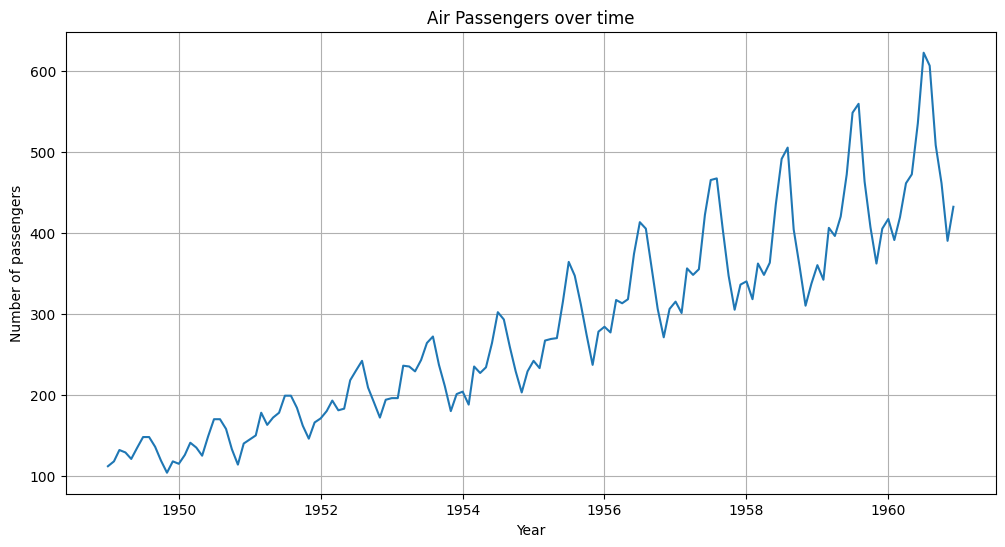

In [19]:
plt.figure(figsize=(12,6))
plt.plot(airline)
plt.title('Air Passengers over time')
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.grid(True)
plt.show()

**Trend or seasonality**
*  The plot shows a clear upward trend in the number of passengers over time, indicating long-term growth in air travel. Additionally, there appears to be a repeating seasonal pattern, with peaks and troughs occurring at regular intervals, likely due to seasonal travel demand.

#### MOVING AVERAGES FOR TIME SERIES SMOOTHING

**Simple Moving Average**
- **SMA** is the most basic type of moving average. It calculates the average of a set number of recent data points

**Eg using stock price**
*  Moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average. For example, one could add the closing price of a security for a number of time periods and then divide this total by that same number of periods. Short-term averages respond quickly to changes in the price of the underlying security, while long-term averages are slower to react.

- The formula for SMA is:
  - SMA = (A1 +A2 +...+An)/n

**Where**
- An = price of an asset at period n
- n =  total number of period


 
​
 

​


**Weighted Moving Average**
* **The weighted moving average (WMA)** is a technical indicator that assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past.
The WMA is obtained by multiplying each number in the data set by a predetermined weight and summing up the resulting values

**How to Calculate the Weighted Moving Average**
*  Identify the numbers you want to average eg.we can use the closing prices of ABC stock for the period starting January 1 to January 5. The closing prices are $90, $88, $89, $90, and $91, with the first number being the most recent

*  Determine the weights of each number. The equation we use for weighting each number is the day number divided by the sum of all the day numbers.  Since we are looking at five days, the sum of all the day numbers in this example is 15 (i.e., 5 + 4 + 3 + 2 + 1). We give the greatest weighting to the most recent data point ($91 having 1/15)

*  Multiply each number by the weighting factor($91*(1/15))

*  Add up resulting values to get the weighted average

**Advantages and Limitations of Using Moving Averages for Forecasting**  

**Advantages:**

* Simplicity: Moving averages are easy to understand and calculate, making them accessible to a wide range of users.  

* Trend Identification: They effectively smooth out noise in data, making it easier to identify underlying trends. 
  
* Noise Reduction: By averaging out fluctuations, they help to focus on the overall direction of the data.  

* Easy Implementation: Moving averages can be easily implemented in various tools, from spreadsheets to specialized statistical software.

* Adaptability: Different types of moving averages (SMA, WMA, EMA) can be chosen based on the specific needs of the forecast.

**Limitations**
* Lagging Indicator: Moving averages are based on past data, making them lagging indicators. They react to changes in the data with a delay, which can be problematic for short-term forecasting or in volatile markets.  

* Sensitivity to Period Selection: The choice of the period for the moving average significantly impacts the results. Too short a period can lead to oversensitivity to noise, while too long a period can result in excessive smoothing and loss of important details.
   
* Equal Weighting (SMA): Simple moving averages give equal weight to all data points in the period, which may not be appropriate when more recent data is more relevant for forecasting.

* End Point Problem: Moving averages cannot be calculated for the most recent data points, resulting in a loss of information at the end of the time series.
Poor Performance with Seasonality: Moving averages may not effectively capture complex seasonal patterns in the data.

* Limited Extrapolation: Moving averages are primarily used for smoothing and trend identification, and they may not be the most accurate method for extrapolating far into the future.


In [6]:
sales_df = pd.read_csv('retail_sales_dataset.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [10]:
daily_sales = sales_df.groupby('Date')['Total Amount'].sum().reset_index()
daily_sales

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


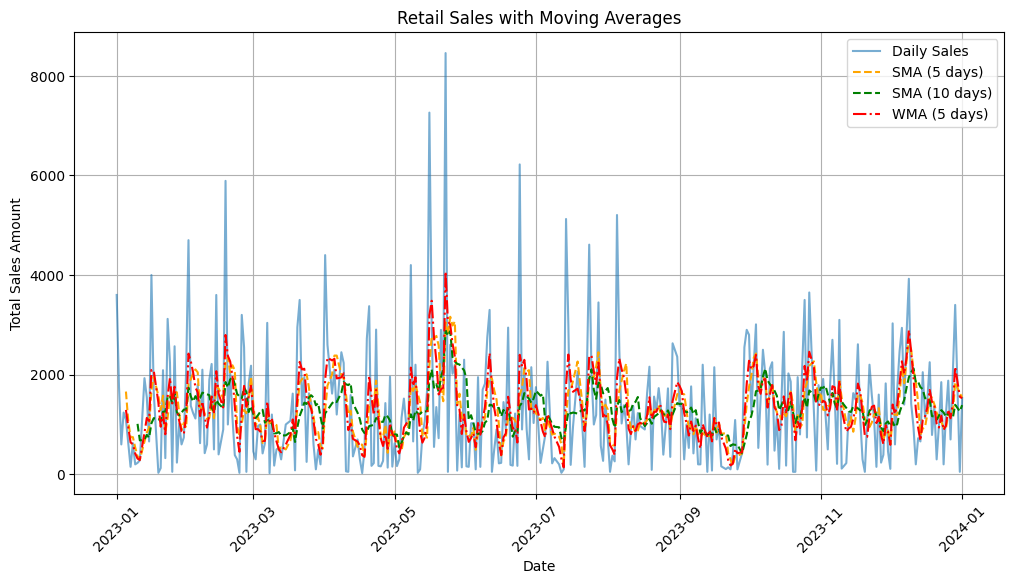

In [13]:

sales_df.sort_values(by='Date', inplace=True)

# Compute Simple Moving Averages (SMA)
daily_sales['SMA_5'] = daily_sales['Total Amount'].rolling(window=5).mean()
daily_sales['SMA_10'] = daily_sales['Total Amount'].rolling(window=10).mean()

# Compute Weighted Moving Average (WMA) with linearly decreasing weights
weights = np.arange(1, 6)  # Define weights (1 to 5)
daily_sales['WMA_5'] = daily_sales['Total Amount'].rolling(window=5).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], label="Daily Sales", linestyle="-", alpha=0.6)
plt.plot(daily_sales['Date'], daily_sales['SMA_5'], label="SMA (5 days)", linestyle="--", color='orange')
plt.plot(daily_sales['Date'], daily_sales['SMA_10'], label="SMA (10 days)", linestyle="--", color='green')
plt.plot(daily_sales['Date'], daily_sales['WMA_5'], label="WMA (5 days)", linestyle="-.", color='red')

# Formatting the plot
plt.title("Retail Sales with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
